# Código para reconhecimento Facial e aplicações de visão computacional


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2

!bunzip2 shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 dlib_face_recognition_resnet_model_v1.dat.bz2


--2025-04-21 16:57:09--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-04-21 16:57:09--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  33.2MB/s    in 1.8s    

2025-04-21 16:57:11 (33.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

--2025-04-21 16:57:11--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.18

In [ ]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
from scipy.spatial import distance as dist
from deepface import DeepFace

In [ ]:
img = cv2.imread("chat_img.png")

In [ ]:
import os
print(os.listdir())  # Lista os arquivos na pasta atual


['.config', 'shape_predictor_68_face_landmarks.dat', 'dlib_face_recognition_resnet_model_v1.dat', 'chat_img.png', '.ipynb_checkpoints', 'pessoa1.png', 'pessoa2.png', 'sample_data']


In [ ]:
img

array([[[174, 177, 174],
        [176, 177, 176],
        [173, 177, 177],
        ...,
        [200, 204, 196],
        [199, 203, 197],
        [203, 203, 202]],

       [[174, 177, 176],
        [172, 179, 173],
        [173, 178, 173],
        ...,
        [203, 201, 196],
        [202, 203, 200],
        [203, 206, 197]],

       [[174, 177, 176],
        [176, 178, 172],
        [176, 179, 175],
        ...,
        [199, 201, 198],
        [203, 203, 198],
        [201, 201, 198]],

       ...,

       [[218, 195, 183],
        [219, 204, 182],
        [222, 206, 187],
        ...,
        [148, 172, 189],
        [148, 170, 189],
        [143, 171, 184]],

       [[222, 198, 181],
        [221, 201, 180],
        [226, 209, 188],
        ...,
        [150, 170, 190],
        [147, 167, 187],
        [143, 167, 183]],

       [[218, 197, 183],
        [228, 206, 184],
        [229, 208, 190],
        ...,
        [141, 165, 190],
        [144, 163, 187],
        [145, 169, 181]]

In [ ]:
img.shape

(1024, 1024, 3)

In [ ]:
# instânciando o dector de rostos
detector = dlib.get_frontal_face_detector()
# convertendo imagem em uma resolução mais baixa ( toda cinza )
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# new_shape = (1000,1000,3)
# img_gray.resize(new_shape)
# pegando os vetores das loc dos rostos
faces = detector(img_gray)
faces

rectangles[[(257, 209) (472, 424)], [(233, 663) (448, 878)], [(-30, 137) (209, 352)], [(567, 161) (782, 376)], [(472, 615) (687, 830)], [(-54, 615) (185, 830)], [(735, 567) (950, 782)], [(878, 281) (1093, 496)]]

In [ ]:
faces[0].top()

209

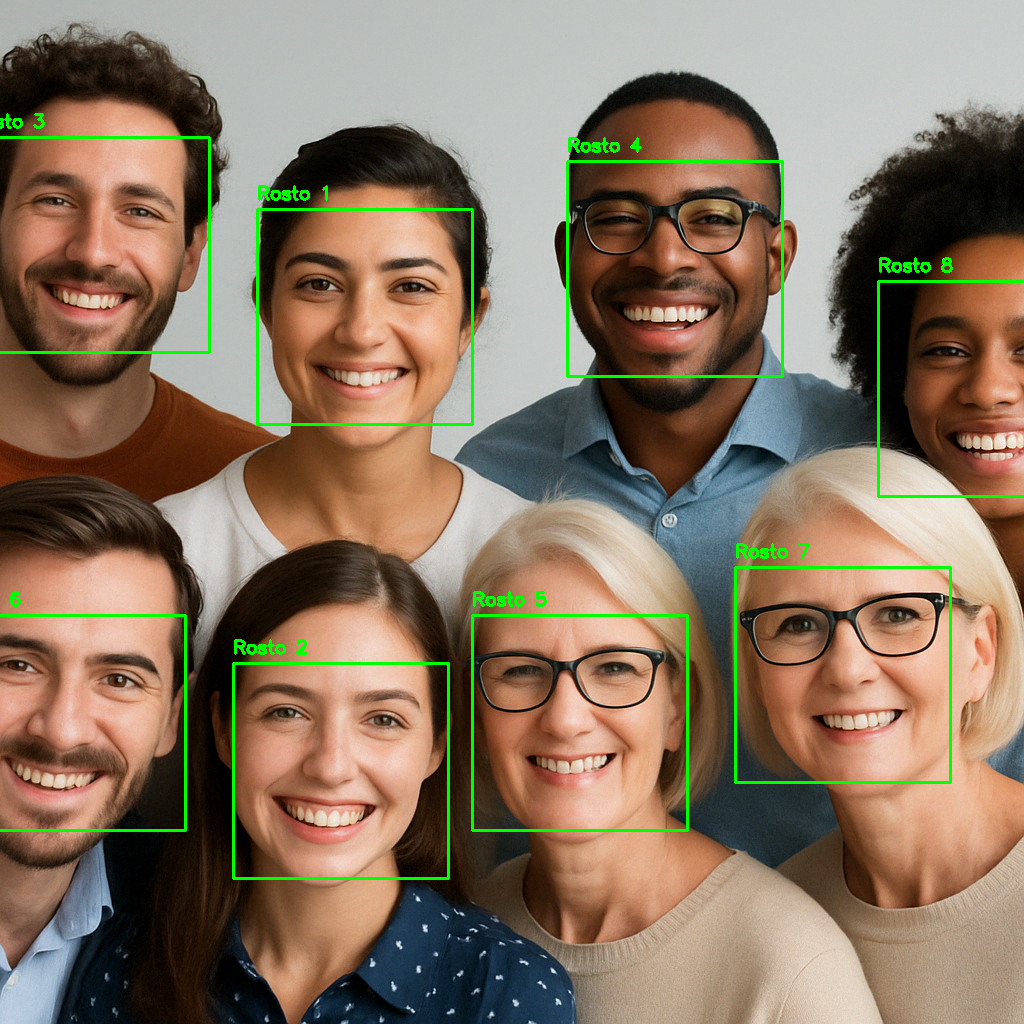

In [ ]:
try:

  for i , rosto in enumerate(faces):
    x1 = rosto.left()
    y1 = rosto.top()
    x2 = rosto.right()
    y2 = rosto.bottom()

    cv2.rectangle(img, (x1,y1),(x2,y2),(0, 255, 0), 2)
    cv2.putText(img, f"Rosto {i+1}", (x1, y1 - 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

except Exception as e:
    print(f"erro:{e} no rosto de número {i}")


cv2_imshow(img)




- Comparando duas imagens por distância Eucliadiana usando o DeepFace para verificarmos se é ou não a mesma pessoa


In [ ]:
pessoa1 = cv2.imread("/content/pessoa1.png")
pessoa2 = cv2.imread("/content/pessoa2.png")

In [ ]:
pessoa1.shape # tamanho da imagem 1

(1536, 1024, 3)

In [ ]:
# img_rgb1 = cv2.cvtColor(pessoa1, cv2.COLOR_BGR2RGB)
# img_rgb2 = cv2.cvtColor(pessoa2, cv2.COLOR_BGR2RGB)

In [ ]:
def recon_facial(img1,img2):
  emb1 = DeepFace.represent(img_path = pessoa1, model_name = 'Facenet')[0]["embedding"]
  emb2 = DeepFace.represent(img_path = pessoa2, model_name = 'Facenet')[0]["embedding"]

  distance = dist.euclidean(emb1, emb2)

  if distance < 12:
    print(f"distância eucliadiana é {distance}, logo são a mesma pessoa")
  else:
    print(f"distância eucliadiana é {distance}, logo não é a mesma pessoa")


In [ ]:
recon_facial(pessoa1,pessoa2)

distância eucliadiana é 10.610758017620563, logo são a mesma pessoa


- Vendo se na imagem com várias pessoas, conseguimos reconhecer uma pessoa específica na foto

In [ ]:
detected_faces = DeepFace.extract_faces(img_path=img, enforce_detection=False)

In [ ]:
detected_faces[0]["face"] # é uma lista com dicionários de todas as características da face de cada pessoa

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.70980392, 0.72941176, 0.71764706],
        [0.71764706, 0.72941176, 0.7254902 ],
        [0.71764706, 0.74901961, 0.74117647]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.70980392, 0.7254902 , 0.70588235],
        [0.71764706, 0.74509804, 0.73333333],
        [0.7254902 , 0.74509804, 0.7372549 ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.69019608, 0.71372549, 0.69803922],
        [0.69803922, 0.71764706, 0.71764706],
        [0.71372549, 0.7254902 , 0.72941176]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
# detected_faces = DeepFace.extract_faces(img_path=img, enforce_detection=False)

# emb1 = DeepFace.represent(img_path = pessoa1, model_name = 'Facenet')[0]["embedding"]

# dict_distance = {}
# # Comparar cada rosto da imagem com a pessoa de referência
# for i, face in enumerate(detected_faces):
#     face_crop = face["face"]  # o crop do rosto (em RGB)

#     emb_pessoa = DeepFace.represent(img_path=face_crop, model_name="Facenet",enforce_detection=False)[0]["embedding"]

#     distance = dist.euclidean(emb_pessoa,emb1)

#     dict_distance[f"rosto{i}"] = distance

# print(dict_distance)

{'rosto0': 13.047452457679668, 'rosto1': 13.045892431436503, 'rosto2': 13.04553342797678, 'rosto3': 13.046757432996229, 'rosto4': 13.049439911655886, 'rosto5': 13.048018702781762, 'rosto6': 13.049487567107608, 'rosto7': 13.048322298461988}


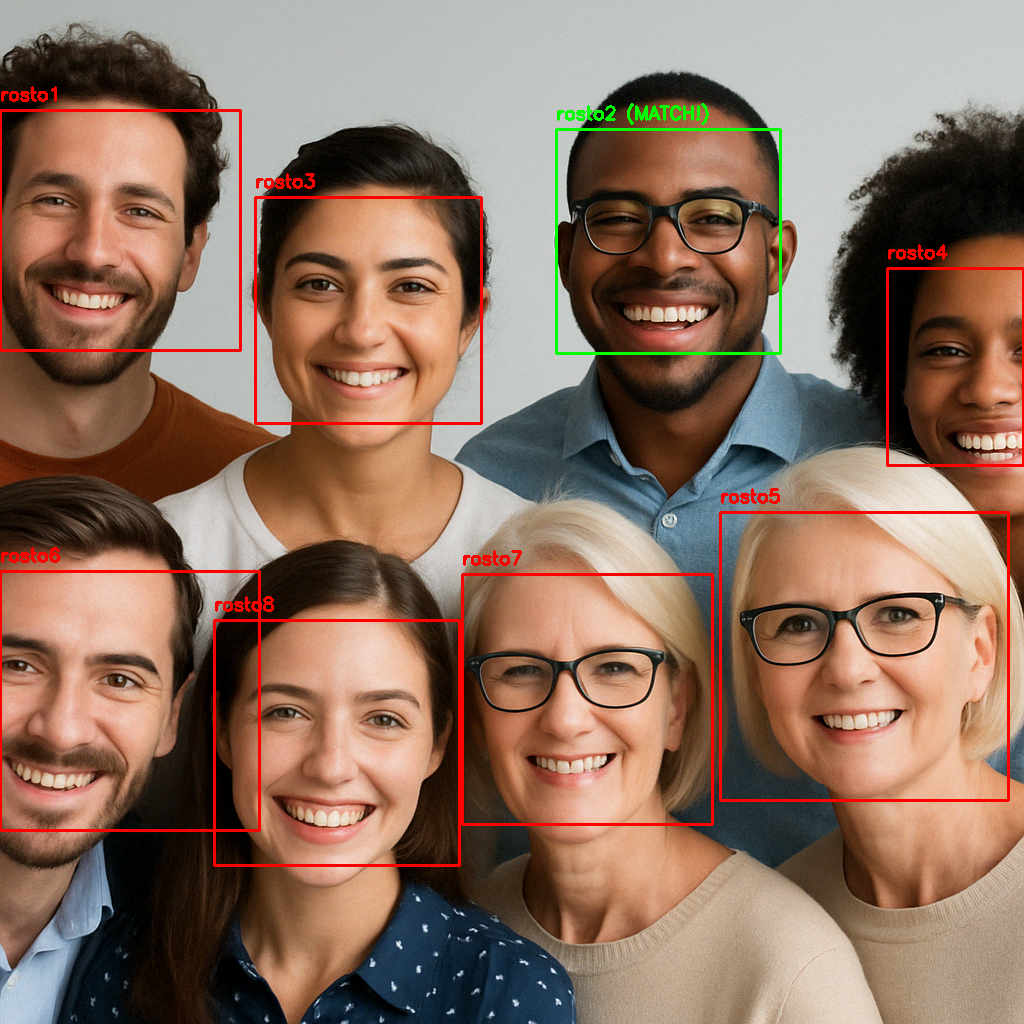

✅ O rosto mais provável é o: rosto2, com distância: 13.1324


In [ ]:
# Carregar imagens
img_chat = "chat_img.png"

img =cv2.imread(img_chat)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


pessoa2 = "pessoa2.png"

# Extrair todos os rostos da imagem principal
detected_faces = DeepFace.extract_faces(img_path=img_chat, enforce_detection=False)

# Extrair embedding da pessoa de referência
emb1 = DeepFace.represent(img_path=pessoa1, model_name='Facenet')[0]["embedding"]

# Dicionário para guardar distâncias e posições
dict_distance = {}
dict_regions = {}

# Loop para calcular distância para cada rosto
for i, face in enumerate(detected_faces):
    face_crop = face["face"]
    region = face["facial_area"]

    emb_pessoa = DeepFace.represent(img_path=face_crop,model_name="Facenet",enforce_detection=False)[0]["embedding"]

    dist_euc = dist.euclidean(emb_pessoa, emb1)

    chave = f"rosto{i+1}"
    dict_distance[chave] = dist_euc
    dict_regions[chave] = region

# Encontrar o rosto mais próximo
chave_menor = min(dict_distance, key=dict_distance.get)
valor_menor = dict_distance[chave_menor]

# Desenhar todos os rostos e destacar o mais próximo
for chave, region in dict_regions.items():
    x, y, w, h = region["x"], region["y"], region["w"], region["h"]

    if chave == chave_menor:
        cor = (0, 255, 0)  # verde: rosto mais parecido
        label = f"{chave} (MATCH!)"
    else:
        cor = (0, 0, 255)  # vermelho: outros
        label = chave

    cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)
    cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, cor, 2)

# Mostrar resultado
cv2_imshow(img)

# Resultado final
print(f"✅ O rosto mais provável é o: {chave_menor}, com distância: {valor_menor:.4f}")
